Відрізок 1:
S_0(x) = 1.19 + 9.9265(x - 0.3) + 0.0(x - 0.3)^2 + -65.6626(x - 0.3)^3, x належить [0.3, 0.5]
Відрізок 2:
S_1(x) = 2.65 + 2.047(x - 0.5) + -39.3975(x - 0.5)^2 + 78.2104(x - 0.5)^3, x належить [0.5, 0.8]
Відрізок 3:
S_2(x) = 1.83 + -0.4747(x - 0.8) + 30.9918(x - 0.8)^2 + -43.1062(x - 0.8)^3, x належить [0.8, 1.2]
Відрізок 4:
S_3(x) = 3.84 + 6.6609(x - 1.2) + -20.7357(x - 1.2)^2 + -11.5198(x - 1.2)^3, x належить [1.2, 1.8]
Значення сплайна:
x = 0.30, y = 1.190
x = 0.32, y = 1.430
x = 0.33, y = 1.644
x = 0.35, y = 1.834
x = 0.36, y = 2.001
x = 0.38, y = 2.146
x = 0.39, y = 2.270
x = 0.41, y = 2.374
x = 0.42, y = 2.460
x = 0.44, y = 2.529
x = 0.45, y = 2.581
x = 0.47, y = 2.617
x = 0.48, y = 2.640
x = 0.50, y = 2.650
x = 0.51, y = 2.647
x = 0.53, y = 2.634
x = 0.54, y = 2.611
x = 0.56, y = 2.580
x = 0.57, y = 2.541
x = 0.59, y = 2.496
x = 0.60, y = 2.446
x = 0.62, y = 2.392
x = 0.63, y = 2.335
x = 0.65, y = 2.276
x = 0.66, y = 2.216
x = 0.68, y = 2.157
x = 0.69, y = 2.099
x = 0

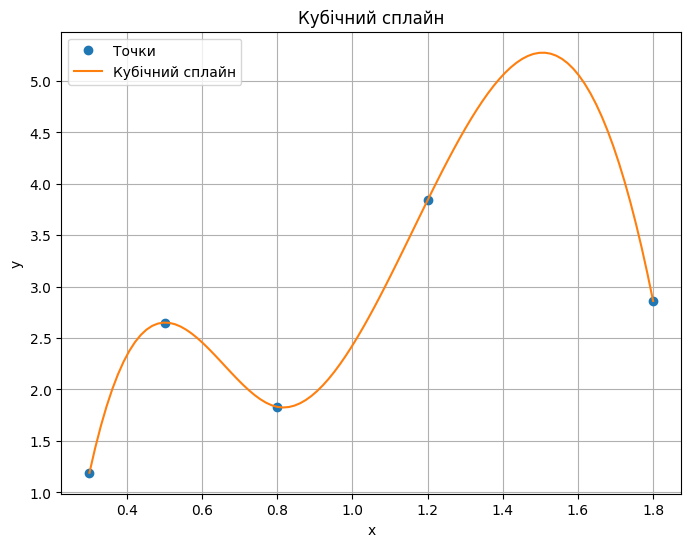

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
# Задані точки
x = np.array([0.3, 0.5, 0.8, 1.2, 1.8])
y = np.array([1.19, 2.65, 1.83, 3.84, 2.86])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)

alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)

for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Виправлення обчислення коефіцієнтів для останнього відрізка
c[n-1] = (alpha[n-1] - h[n-2] * z[n-2]) / (2 * (h[n-2] + mu[n-1]))
b[n-1] = (a[n] - a[n-1]) / h[n-1] - h[n-1] * (2 * c[n-1] + c[n-2]) / 3
d[n-1] = (c[n-1] - c[n-2]) / (3 * h[n-1])


for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

print("Значення сплайна:")
for i in range(len(x_new)):
    print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()
